In [22]:
# This file is generated and updated by LSSS

import json
import os
import glob
import xarray as xr
import requests
import lsss
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, subplots_adjust, get_cmap

In [28]:
baseUrl = lsss.baseUrl
freq=lsss.get('/lsss/data/frequencies')
exportDir = 'D:\GLIDER2018\Echosounder\LSSS_Tromsøflaket\Export\PythonAPI_BBSv'

In [29]:
# =============================================================================
# Which files to read, reads from the "active" raw data LSSS folder
# =============================================================================
#files = requests.get('D:GLIDER2018/Echosounder/LSSS_Tromsøflaket/').json()
files = requests.get(baseUrl + '/lsss/survey/config/unit/DataConf/files').json()
n=len(files)    # How many files?
print(n) # Prints available files
m=len(freq) # Counts number of frequencies\

357


In [30]:
# =============================================================================
# Zoom out maximally, might not be necassary
# =============================================================================
cur_zoom=lsss.get('/lsss/module/PelagicEchogramModule/zoom')
max_zoom = lsss.get('/lsss/module/PelagicEchogramModule/zoom/max')
start_time = max_zoom[0]['time']
stop_time = max_zoom[1]['time']
# =============================================================================
zoomRegion = [{'pingNumber': max_zoom[0]['pingNumber']}, {'pingNumber': max_zoom[1]['pingNumber']}]
requests.post(baseUrl + '/lsss/module/PelagicEchogramModule/zoom', json=zoomRegion)
# =================================

<Response [204]>

In [31]:
print(start_time, 'to', stop_time)

2018-06-21T08:01:06.055Z to 2018-06-21T23:05:32.162Z


In [32]:
# =============================================================================
# This is just to reset any interpretation and make sure we're in pelagic mode
# =============================================================================
#lsss.post('/lsss/package/lsss/action/resetInterpretation/run')
lsss.post('/lsss/survey/config/unit/SurveyMiscConf/parameter/PelagicMode', json={'value':'True'})

In [49]:
# Read top and bottom limits from files
flist = glob.glob('F:GLIDER2018/Echosounder/Echosounder/nc_files/GLIDER_SB_2018_v5-Phase0-D20180621*-ssl.nc')
ds = xr.open_dataset(flist[0])
ds.ping_time

<xarray.DataArray 'ping_time' (ping_time: 173)>
array(['2018-06-21T08:01:06.055000064', '2018-06-21T08:01:08.085000192',
       '2018-06-21T08:01:10.113999872', '2018-06-21T08:01:12.138999808',
       '2018-06-21T08:01:14.165000192', '2018-06-21T08:01:16.189000192',
       '2018-06-21T08:01:18.216999936', '2018-06-21T08:01:20.243999744',
       '2018-06-21T08:01:22.270000128', '2018-06-21T08:01:24.290999808',
       '2018-06-21T08:01:26.312000000', '2018-06-21T08:01:28.342000128',
       '2018-06-21T08:01:30.368000000', '2018-06-21T08:01:32.392000000',
       '2018-06-21T08:01:34.422000128', '2018-06-21T08:01:36.440999936',
       '2018-06-21T08:01:38.472000000', '2018-06-21T08:01:40.490999808',
       '2018-06-21T08:01:42.520000000', '2018-06-21T08:01:44.547999744',
       '2018-06-21T08:01:46.570999808', '2018-06-21T08:01:48.592000000',
       '2018-06-21T08:01:50.617999872', '2018-06-21T08:01:52.645000192',
       '2018-06-21T08:01:54.666999808', '2018-06-21T08:01:56.693000192',
       '2018-06-21T08:01:58.720999936', '2018-06-21T08:02:00.752000000',
       '2018-06-21T08:02:02.768999936', '2018-06-21T08:02:04.799000064',
       '2018-06-21T08:02:06.821000192', '2018-06-21T08:02:08.851999744',
       '2018-06-21T08:02:10.879000064', '2018-06-21T08:02:12.901000192',
       '2018-06-21T08:02:14.922999808', '2018-06-21T08:02:16.945999872',
       '2018-06-21T08:02:18.976999936', '2018-06-21T08:02:20.997000192',
       '2018-06-21T08:02:23.029000192', '2018-06-21T08:02:25.052000256',
       '2018-06-21T08:02:27.079000064', '2018-06-21T08:02:29.097999872',
       '2018-06-21T08:02:31.126000128', '2018-06-21T08:02:33.146999808',
       '2018-06-21T08:02:35.173000192', '2018-06-21T08:02:37.199000064',
       '2018-06-21T08:02:39.228000256', '2018-06-21T08:02:41.248000000',
       '2018-06-21T08:02:43.279000064', '2018-06-21T08:02:45.304999936',
       '2018-06-21T08:02:47.324000256', '2018-06-21T08:02:49.346999808',
       '2018-06-21T08:02:51.376000000', '2018-06-21T08:02:53.402999808',
       '2018-06-21T08:02:55.422000128', '2018-06-21T08:02:57.452000256',
       '2018-06-21T08:02:59.472000000', '2018-06-21T08:03:01.503000064',
       '2018-06-21T08:03:03.520999936', '2018-06-21T08:03:05.552000000',
       '2018-06-21T08:03:07.570999808', '2018-06-21T08:03:09.600000000',
       '2018-06-21T08:03:11.626999808', '2018-06-21T08:03:13.654000128',
       '2018-06-21T08:03:15.672999936', '2018-06-21T08:03:17.699999744',
       '2018-06-21T08:03:19.719000064', '2018-06-21T08:03:21.744000000',
       '2018-06-21T08:03:23.772000256', '2018-06-21T08:03:25.792999936',
       '2018-06-21T08:03:27.824000000', '2018-06-21T08:03:29.848000000',
       '2018-06-21T08:03:31.869000192', '2018-06-21T08:03:33.898999808',
       '2018-06-21T08:03:35.928000000', '2018-06-21T08:03:37.950000128',
       '2018-06-21T08:03:39.971999744', '2018-06-21T08:03:42.001999872',
       '2018-06-21T08:03:44.018999808', '2018-06-21T08:03:46.051999744',
       '2018-06-21T08:03:48.077000192', '2018-06-21T08:03:50.097999872',
       '2018-06-21T08:03:52.119000064', '2018-06-21T08:03:54.143000064',
       '2018-06-21T08:03:56.172000256', '2018-06-21T08:03:58.200999936',
       '2018-06-21T08:04:00.218999808', '2018-06-21T08:04:02.240999936',
       '2018-06-21T08:04:04.273999872', '2018-06-21T08:04:06.298999808',
       '2018-06-21T08:04:08.321999872', '2018-06-21T08:04:10.341000192',
       '2018-06-21T08:04:12.371999744', '2018-06-21T08:04:14.393999872',
       '2018-06-21T08:04:16.421000192', '2018-06-21T08:04:18.439000064',
       '2018-06-21T08:04:20.471000064', '2018-06-21T08:04:22.485000192',
       '2018-06-21T08:04:24.513999872', '2018-06-21T08:04:26.538999808',
       '2018-06-21T08:04:28.568000000', '2018-06-21T08:04:30.588000256',
       '2018-06-21T08:04:32.608000000', '2018-06-21T08:04:34.636000256',
       '2018-06-21T08:04:36.666999808', '2018-06-21T08:04:38.681999872',
       '2018-06-21T08:04:40.711000064', '2018-06-21T08:04:42.733000192',
       '20

In [42]:
for f_ind in range(0,1):
    ds = xr.open_dataset(flist[f_ind])
    top = ds['top_scattering_layer']
    bottom = ds['bottom_scattering_layer']
    time = ds['ping_time']

In [14]:
# =============================================================================
# Assuming that you have ping numbers and max/min depths of the layer(s)
# You can of course use time instead
# =============================================================================

time=[1,2,3,4,5]
z1=[20, 21, 21, 24, 24.5]
z2=[30, 31, 30, 34, 34.5]
n=len(time)

In [45]:
# =============================================================================
# This part is stupid of course, but haven't figured out how to 
# "draw" using the API
# But this will do the job...
# Alternatively on can use horizontal layers
# =============================================================================

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

dict={'ids':[]}

for i in my_range(0, n-1, 1):
    example={ "time": time[i:i+15], "depthRanges": [ { "min": top[i], "max": bottom[i] }] }
    lsss.post('/lsss/module/PelagicEchogramModule/school-mask', json=example)
    i

regionId=lsss.get('/lsss/regions/region')
n=len(regionId)
for i in my_range(0, n-1, 1):
        infoRegion=lsss.get('/lsss/regions/region/'+str(regionId[i]['id']))
        # Is the region a school?
        if infoRegion['type'] == 'school':
            ids = regionId[i]['id']
            dict['ids'].append(ids)
# Selects all regions
op = { "operation" : "SET" , "schools": "true"}
lsss.post('/lsss/regions/selection', json=op)

TypeError: Object of type DataArray is not JSON serializable

In [22]:
# =============================================================================
# Extract the broadband Sv frequencies for that region (selected schools that represent the layer)
# =============================================================================

requests.get(baseUrl + '/lsss/data/wait')   # Just make sure LSSS is ready
lsss.post('/lsss/module/BroadbandSvModule/enabled', json={'value':True})  # Just make sure the BB Sv(f) window is active
params=lsss.get('/lsss/module/BroadbandSvModule/config/parameter')  # What can you get out, and what are the settings
BBSv=lsss.get('/lsss/module/BroadbandSvModule/data')

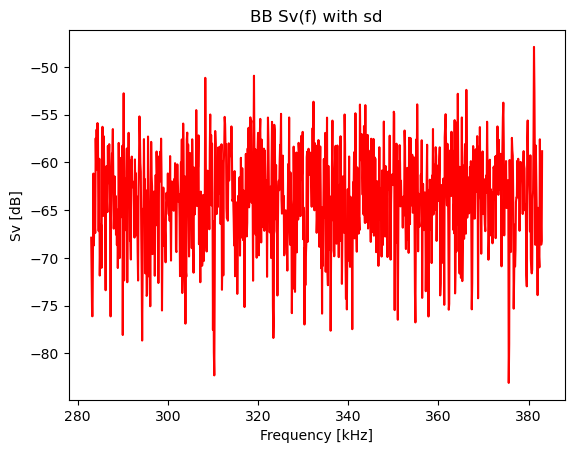

In [23]:
# =============================================================================
#  Plot the data
# =============================================================================
fig1 = figure()
plt.plot(BBSv['datasets'][0]['frequency'],BBSv['datasets'][0]['sv'],'r')
#plt.plot(BBSv['datasets'][1]['frequency'],BBSv['datasets'][1]['sv'],'k--')
#plt.plot(BBSv['datasets'][2]['frequency'],BBSv['datasets'][2]['sv'],'k--')
plt.title('BB Sv(f) with sd')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Sv [dB]')
show()

In [24]:
# =============================================================================
# Save the BB Sv data in a json file
# =============================================================================
a_file = open(exportDir + '/BBFrequencyResponse.json', "w")
json.dump(BBSv, a_file,indent=2)
a_file.close()